## Proposal for Parallel Semisupervised Learning --- Motivation and Small Scale Experimentation
This is the documentation for generating demonstration examples for the parallel SSL project. We use a simple 2 moon simulated data sets with a small number of labelled points to give intuitions to different approach.

This is also for preparing the slides for both project report and oral exam.

## Motivating Simulated Example
We use a two moon example to demonstrate the effectiveness of semi supervised learning, and discuss possible effects of parallel processing of SSL.

## Why Consider Unlabeled Data?
We first demonstrate how unlabeled data can help making better predictions on a simulated two moon datasets.

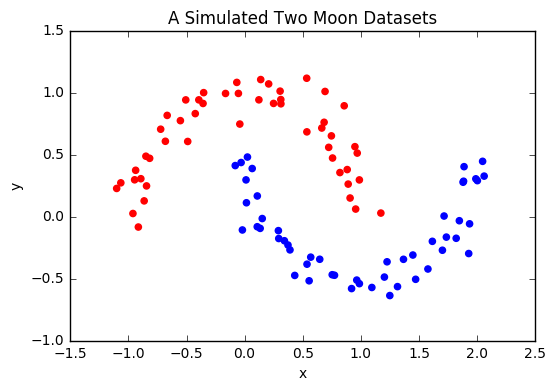

In [81]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

data_sets = make_moons(n_samples=100,noise=0.1,random_state=0)
col = []
t = ['red','blue']
for i in data_sets[1]:
    col.append(t[i])
    
plt.scatter(x=data_sets[0][:,0],y=data_sets[0][:,1],color=col)
plt.title("A Simulated Two Moon Datasets")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Above is a typical two moon data sets. If we use the coordinate of each data point as their features, and perform usual linear regression or use linear classifiers, we will not get any good results. Graph-based semi-supervised learning on the other hand, could construct a graph which is able to utilize the geometric property of the data sets to make labeling predictions.

### Data Sets with Few Labeled Data

Now, we randomly choose 10 labeled points from this simulated data sets, and use them as basis for our label predictions.


In [82]:
import numpy as np
import random
lid = np.random.choice(len(data_sets[0]),size=10)
xl = [data_sets[0][lid,:],data_sets[1][lid]]

Now, assume we do not know the labeling of the rest of the data points. We visualize the labeled data and unlabeled data.

In the scenario where we only have a few available labeled points, consider both the labeled and unlabeled data sets can help us make better labeling predictions.

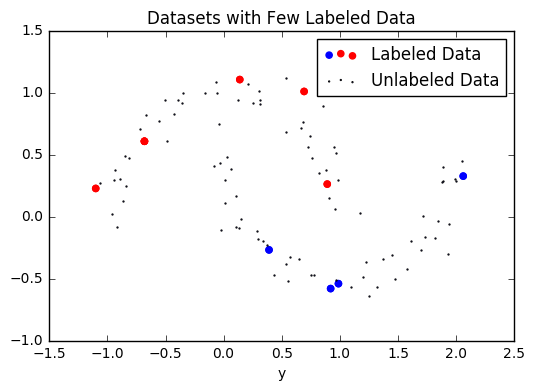

In [92]:
# delete the labeled data to greate the unlabeled data sets
uid = np.arange(len(data_sets[1]))
uid=np.delete(uid,lid,None)
# plot both labeled and unlabeled data
xu = [data_sets[0][uid,:],data_sets[1][uid]]
col = []
for i in xl[1]:
    col.append(t[i])
  
p1 = plt.scatter(x = xl[0][:,0],y=xl[0][:,1],color=col)
p2 = plt.scatter(x = xu[0][:,0],y=xu[0][:,1],s=0.4)
plt.legend((p1,p2),('Labeled Data','Unlabeled Data'),loc='upper right')
plt.title('Datasets with Few Labeled Data')
plt.xlabel('x')
plt.xlabel('y')
plt.show()

Consider a "hard to label" point in the simulated data sets. If we do not consider the distribution of the data sets, it is very easy to think it should be labeled "red" because it is closer to the set of red labeled points.

[ 0.0242806   0.47944808]


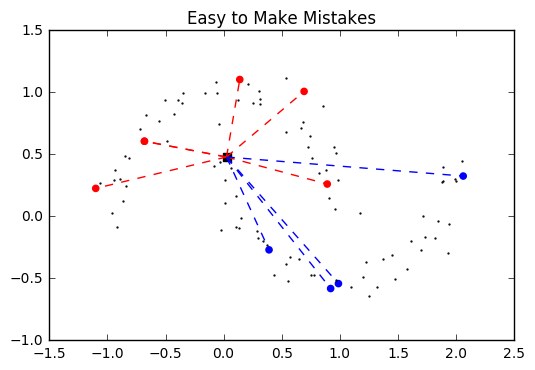

In [153]:
# the hard to label points not considering the strucutre of datas
can = [0,0]
for i in np.arange(len(xu[1])):
    if xu[1][i] ==1:
        if xu[0][i,0]<0.5:
            if xu[0][i,1]>can[1]:
                can = xu[0][i,:]
            
print(can)

# now plot the entire data set, with the hard to label point
p1 = plt.scatter(x = xl[0][:,0],y=xl[0][:,1],color=col)
p2 = plt.scatter(x = xu[0][:,0],y=xu[0][:,1],s=0.4)
p3 = plt.scatter(x = can[0],y=can[1],marker = "s", color = 'black',s= 30 )
#plt.legend((p1,p2,p3),('labeled','unlabeled','Points Hard to label'),loc='upper right')
for i in np.arange(len(xl[1])):
    plt.plot([can[0],xl[0][i,:][0]],[can[1],xl[0][i,:][1]],color=t[xl[1][i]],linestyle= 'dashed' )
plt.title('Easy to Make Mistakes')    
plt.show()


For the black point in the figure above. If we consider the two moon structure of the data sets, it should be labeled as blue. But if we only consider labeled points and ignore all unlabeled points, it is easy to conclude that it should be labeled red because its distance to the red points are smaller. In this case, it is quite clear that the underlying strucutre represented by the unlabeled points would help us make better label predictions.

## Formal Approach

## Partition of Unlabeled Data
The first method for parallel SSL would be to preserve all labeled points and partition the unlabeled data uniformly to create smaller SSL problem instances to be processed on each node. Our simulated data sets contains 100 data points. In real applications, we could have datasets with millions or even billions of entries. If we have 10 nodes to process this problem, following this approach, we would create 10 problem instances each with 10 labeled nodes and 9 unlabeled nodes.

In [152]:
# uniform partition of the data points
xupartition = []
for i in np.arange(10):
    xupartition.append( [ xu[0][np.arange(9)+9*i,:],xu[1][np.arange(9)+9*i]] )
    
#print(xupartition[0])

One potential problem with this approach is that, if $X_u^k$ is too small, the partitioned unlabeled data might not be enough to properly represent the underlying structure of the dataset. We demonstrate this point by visualizing the first partitioned smaller data sets.

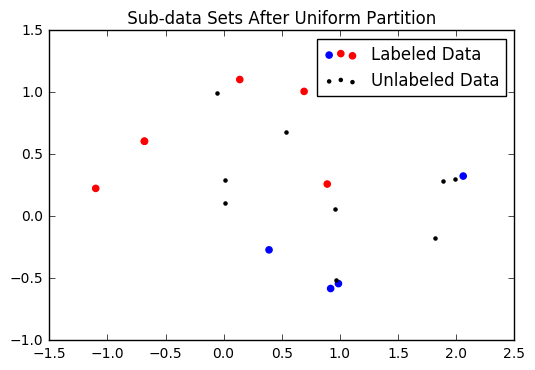

In [162]:
# plot the labeled data together with the first partition of unlabeled data
p1 = plt.scatter(x=xl[0][:,0],y=xl[0][:,1],color=col)
p2 = plt.scatter(x=xupartition[0][0][:,0],y=xupartition[0][0][:,1],color='black',s=5)
plt.legend((p1,p2),('Labeled Data','Unlabeled Data'),loc='upper right')
plt.title(" Sub-data Sets After Uniform Partition ")
plt.show()

It is easy to see from the above figure, that the partitioned data sets is too small to represent the two moon structure present in the entire datasets. This is the major limitation of the uniform partition of unlabeled(UPUD) data approach. In real applications, the underlying structure could be quite complicated and require enough number of data points for the algorithms to learn properly. This relates to the convergence and consistency of SSL methods. No theoretical results so far could guide the choice of the  size of datasets.

## Parition of Entire Datasets Using Graph Cut